## Table of Content

- **[Problem Statement](#prob)**
1. **[Dataset Description](#data)**
2. **[Data Preparation](#prep)**
3.  **[Assumptions Before MLR Model](#before)**
    - 3.1.1 - **[Assumption on Dependent Variable](#dep_num)**
    - 3.1.2 - **[No or Little Multicollinearity](#no_multi)**
    -  3.1.2.1 - **[Correlation Matrix](#corr)**
4. **[Train-Test Split](#split)**
5.  **[Model Building](#model)** 
   -  5.1 - **[MLR Full Model](#full)**
   - 5.2 - **[MLR Model after Removing Insignificant Variables](#signi_var)**
   - 5.3 - **[MLR Model with PCA Technique](#pca)**
    - 5.4 - **[MLR Model with RFE Technique](#rfe)**
    - 5.5 - **[MLR Model with Forward selection Technique](#fwd)**
    - 5.6 - **[MLR Model with Backward selection Technique](#bwd)**
        
6.  **[Assumptions After MLR Model](#assum)**
       - 6.1 - **[Linear Relationship between Dependent and Independent Variable](#linear_reln)**
       - 6.2 - **[Autocorrelation](#auto)**
       - 6.3 - **[Heteroskedasticity](#sked)**
       - 6.4 - **[Tests for Normality](#normality)**
   
7. **[Model Evaluation](#eval)**
      
8. **[K Fold Cross Validation](#kfold)**
    

<a id="prob"></a>
## Problem Statement

**Ticket booking agent wants help to predict the flight price. He gave us the dataset to work on and we decided to use the Linear Regression Model. Created a model that will help him to estimate the price for more profit.**

<a id="data"></a>
## Data Set Description

The data definition which comes with the data is as follows:

**Airline:** Name of a Airline company
    
**Date_of_Journey:** Journey Date
    
**Source:** From where the flight departed

**Route:** Which route the flight is following

**Dep_Time:** At what time the flight departure

**Arrival_Time:** At what time the flight arrived

**Duration:** Duration of the Journey

**Total_Stops:** No of stops flight has during the journey

**Additional_Info:** Information such as meal or check in package is included or not

**Price:** Price of the flight ticket


In [290]:
##importing necessary libraries
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [291]:
##load dataset
df = pd.read_excel("FlightPrice_All.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.000000
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.000000
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.000000
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.000000
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.000000


<a id="prep"></a>
### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">Data Preparation


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [293]:
df.shape

(13354, 11)

In [294]:
df.dropna(axis=0,inplace=True)

In [295]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(7)
memory usage: 1001.4+ KB


In [297]:
flight_data = df.copy()

In [298]:
flight_data.drop('Additional_Info',axis=1,inplace=True)
flight_data.drop('Route',axis=1,inplace=True)

In [299]:
def hr_func(ts):
    return ts.hour

def min_func(ts):
    return ts.minute

In [300]:
flight_data['Dep_Hour'] = flight_data['Dep_Time'].apply(hr_func)
flight_data['Dep_Minute'] = flight_data['Dep_Time'].apply(min_func)

In [301]:
flight_data['Arrival_Hour'] = flight_data['Arrival_Time'].apply(hr_func)
flight_data['Arrival_Minute'] = flight_data['Arrival_Time'].apply(min_func)

In [302]:
flight_data['Journey_Weekday'] = flight_data['Date_of_Journey'].dt.dayofweek
#flight_data['Weekday_Journey'] = flight_data['Date_of_Journey'].apply(lambda x: x.weekday())
flight_data['Journey_Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Journey_Date'] = flight_data['Date_of_Journey'].dt.day

In [303]:
duration=list(flight_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour

In [304]:
flight_data['Duration']=duration

In [305]:
def hour(x):
    return x.split(' ')[0][0:-1]

def min(x):
    return x.split(' ')[1][0:-1]

In [306]:
flight_data['Duration_hours']=flight_data['Duration'].apply(hour)
flight_data['Duration_mins']=flight_data['Duration'].apply(min)

In [307]:
flight_data.drop('Date_of_Journey',axis=1,inplace=True)
flight_data.drop('Arrival_Time',axis=1,inplace=True)
flight_data.drop('Dep_Time',axis=1,inplace=True)
flight_data.drop('Duration',axis=1,inplace=True)

In [308]:
flight_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [309]:
dict = {'1 stop' : 1, 'non-stop': 0, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4}
flight_data['Total_Stops'] = flight_data['Total_Stops'].map(dict)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

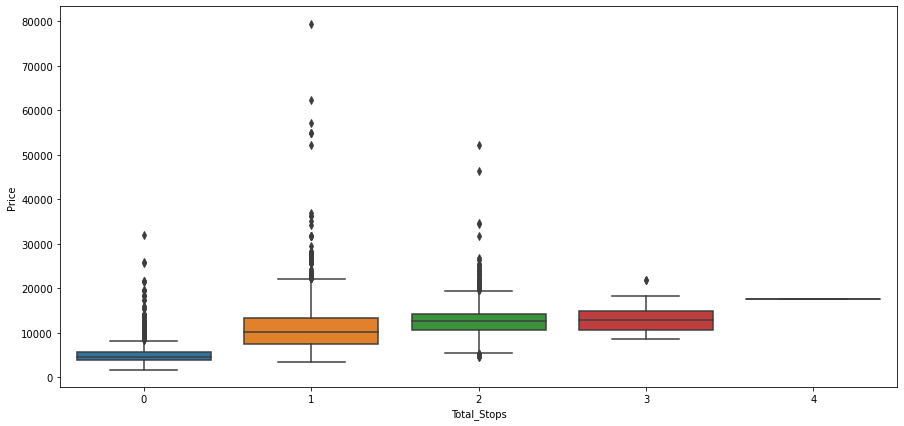

In [310]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Total_Stops'],y = flight_data['Price'])

In [311]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

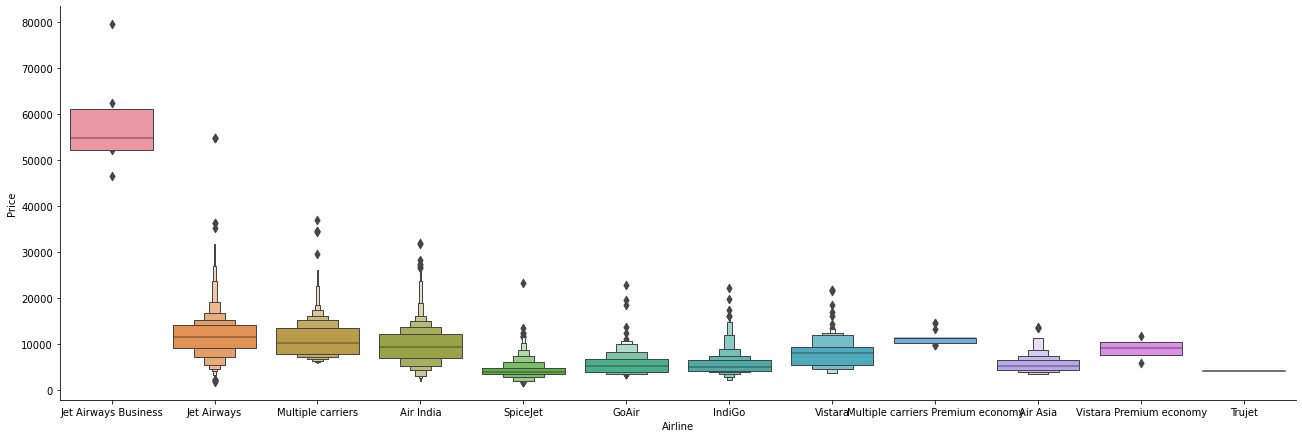

In [312]:
sns.catplot(y = "Price", x = "Airline", data = flight_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

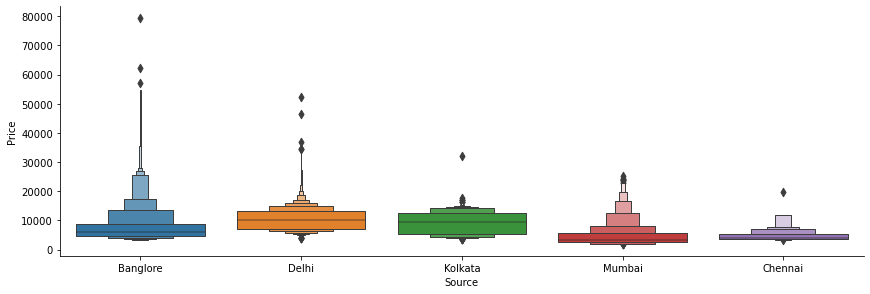

In [313]:
sns.catplot(y = "Price", x = "Source", data = flight_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

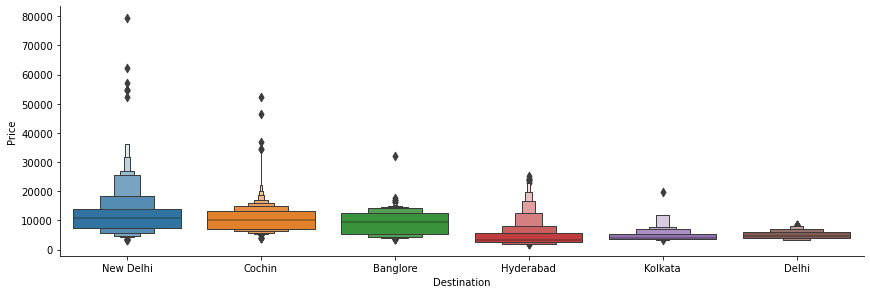

In [314]:
sns.catplot(y = "Price", x = "Destination", data = flight_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

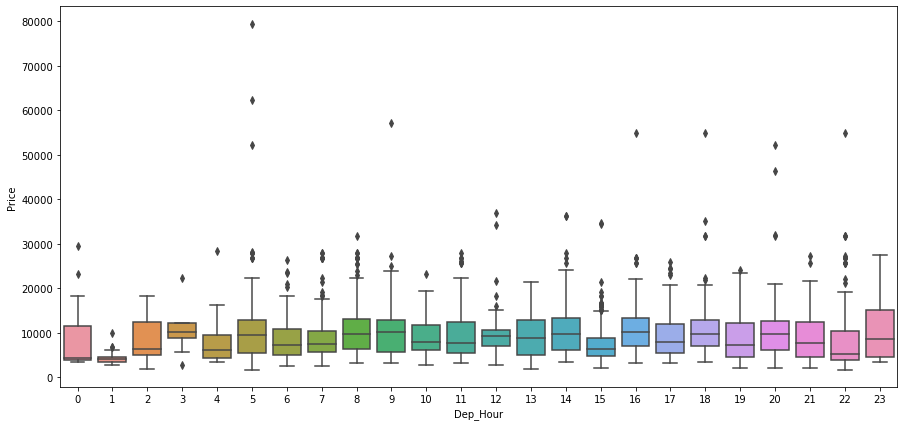

In [315]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Dep_Hour'],y=flight_data['Price'])

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Price'>

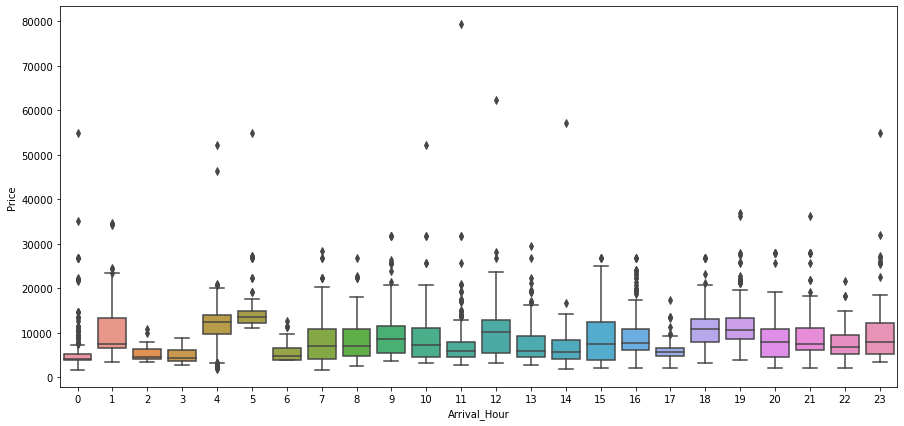

In [316]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Arrival_Hour'],y=flight_data['Price'])

<AxesSubplot:xlabel='Journey_Date', ylabel='Price'>

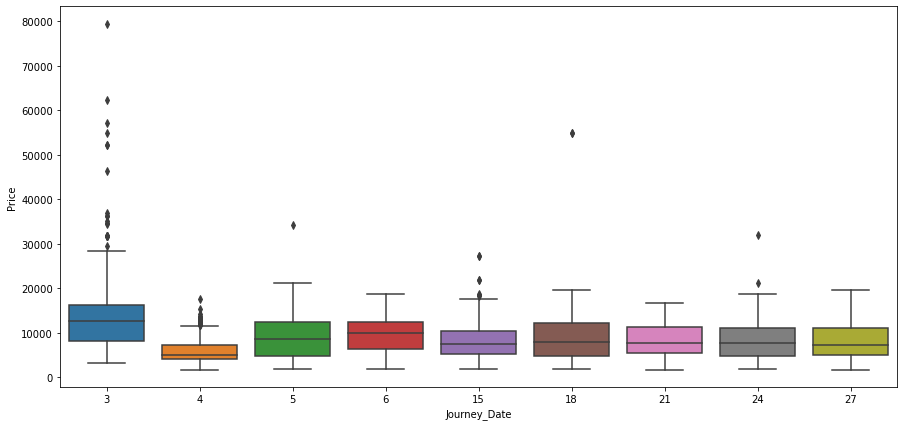

In [317]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Journey_Date'],y=flight_data['Price'])

<AxesSubplot:xlabel='Journey_Month', ylabel='Price'>

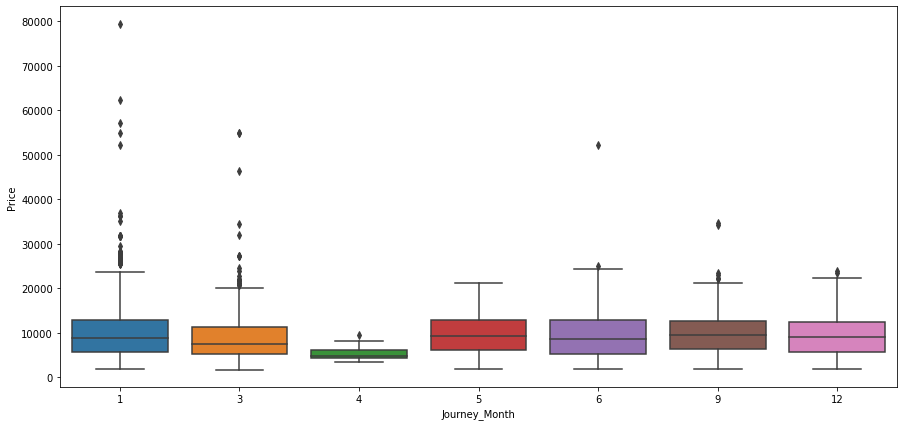

In [318]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Journey_Month'],y=flight_data['Price'])

<AxesSubplot:xlabel='Journey_Weekday', ylabel='Price'>

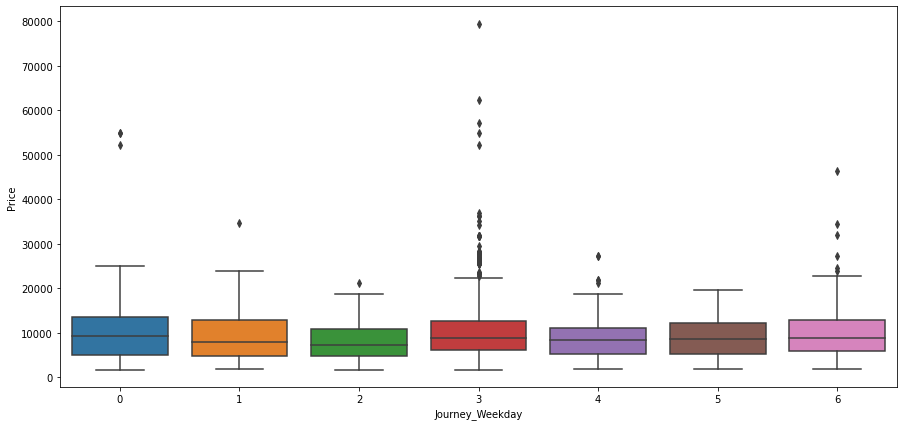

In [319]:
plt.figure(figsize=(15,7))
sns.boxplot(x=flight_data['Journey_Weekday'],y=flight_data['Price'])

<AxesSubplot:xlabel='Duration_hours', ylabel='Price'>

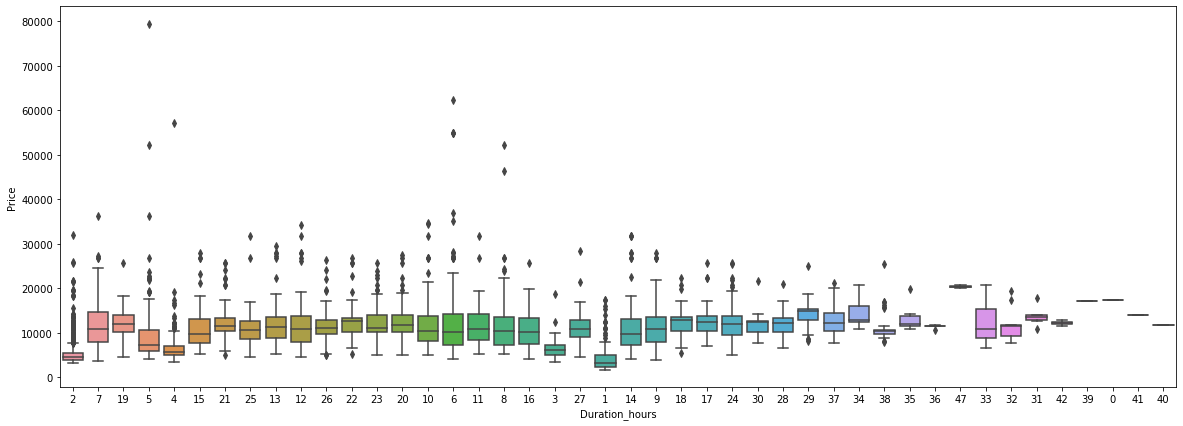

In [320]:
plt.figure(figsize=(20,7))
sns.boxplot(x=flight_data['Duration_hours'],y=flight_data['Price'])

In [321]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Journey_Weekday,Journey_Month,Journey_Date,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897.000000,22,20,1,10,6,3,24,2,50
1,Air India,Kolkata,Banglore,2,7662.000000,5,50,13,15,5,1,5,7,25
2,Jet Airways,Delhi,Cochin,2,13882.000000,9,25,4,25,4,9,6,19,0
3,IndiGo,Kolkata,Banglore,1,6218.000000,18,5,23,30,3,12,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302.000000,16,50,21,35,3,1,3,4,45


In [322]:
flight_data['Duration_hours'] = flight_data['Duration_hours'].astype(int)
flight_data['Duration_mins'] = flight_data['Duration_mins'].astype(int)

In [323]:
flight_data.reset_index(drop = True,inplace=True)

In [324]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Total_Stops      10682 non-null  int64  
 4   Price            10682 non-null  float64
 5   Dep_Hour         10682 non-null  int64  
 6   Dep_Minute       10682 non-null  int64  
 7   Arrival_Hour     10682 non-null  int64  
 8   Arrival_Minute   10682 non-null  int64  
 9   Journey_Weekday  10682 non-null  int64  
 10  Journey_Month    10682 non-null  int64  
 11  Journey_Date     10682 non-null  int64  
 12  Duration_hours   10682 non-null  int32  
 13  Duration_mins    10682 non-null  int32  
dtypes: float64(1), int32(2), int64(8), object(3)
memory usage: 1.1+ MB


In [325]:
y = flight_data['Price']
y.shape

(10682,)

In [326]:
flight_data_num = flight_data.select_dtypes(include=np.number)
flight_data_num.drop('Price',axis=1,inplace=True)
flight_data_num.shape

(10682, 10)

In [327]:
flight_data_num.head()

,Total_Stops,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Journey_Weekday,Journey_Month,Journey_Date,Duration_hours,Duration_mins
0,0,22,20,1,10,6,3,24,2,50
1,2,5,50,13,15,5,1,5,7,25
2,2,9,25,4,25,4,9,6,19,0
3,1,18,5,23,30,3,12,5,5,25
4,1,16,50,21,35,3,1,3,4,45


In [328]:
from sklearn.preprocessing import StandardScaler

In [329]:
scale = StandardScaler().fit_transform(flight_data_num)

flight_data_num_scaled = pd.DataFrame(scale,columns=flight_data_num.columns)
flight_data_num_scaled.head()
flight_data_num_scaled.columns

Index(['Total_Stops', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute', 'Journey_Weekday', 'Journey_Month', 'Journey_Date',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [330]:
flight_data_num_scaled.head()

,Total_Stops,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Journey_Weekday,Journey_Month,Journey_Date,Duration_hours,Duration_mins
0,-1.220666,1.654154,-0.234950,-1.800436,-0.890014,1.692538,-0.848450,1.285536,-0.970614,1.279041
1,1.741432,-1.303113,1.363607,-0.050909,-0.587094,1.147887,-1.517909,-0.872724,-0.381999,-0.196319
2,1.741432,-0.607286,0.031476,-1.363054,0.018745,0.603236,1.159928,-0.759131,1.030677,-1.671678
3,0.260383,0.958326,-1.034229,1.407030,0.321664,0.058585,2.164117,-0.872724,-0.617445,-0.196319
4,0.260383,0.610412,1.363607,1.115442,0.624584,0.058585,-1.517909,-1.099909,-0.735168,0.983969


In [331]:
flight_data_num_scaled.isnull().sum()

Total_Stops        0
Dep_Hour           0
Dep_Minute         0
Arrival_Hour       0
Arrival_Minute     0
Journey_Weekday    0
Journey_Month      0
Journey_Date       0
Duration_hours     0
Duration_mins      0
dtype: int64

# 3 .Assumptions Before MLR Model

<a id="dep_num"></a>
### 3.1.1 Assumption on Dependent Variable

The assumption for linear regression is that the dependent (target) variable should be numeric. In our dataset, the variable 'Price' saved as 'y' is the target/dependent variable. 

In [332]:
y.dtype

dtype('float64')

<a id="no_multi"></a>
### 3.1.2 No or Little Multicollinearity

Whenever there are a large number of independent variables present in the dataset, there is a possibility that such independent variables will be strongly correlated. The presence of a strong correlation between the independent variables is called multicollinearity.

The presence of multicollinearity can destabilize the model. Thus, the existence of multicollinearity must be detected and corrected actions should be taken.

If we use dummy variables to encode a categorical variable and do not omit the parent column, then this results in a strong correlation between the dummy variables and the parent column.

<a id="corr"></a>
#### 3.1.2.1 Correlation Matrix

Let us plot the heatmap to visualize the correlation matrix of the variables. The variables with a high correlation may induce multicollinearity in the data.

In [333]:
flight_data.corr()

,Total_Stops,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Journey_Weekday,Journey_Month,Journey_Date,Duration_hours,Duration_mins
Total_Stops,1.000000,0.603897,-0.061476,-0.002618,0.038140,-0.106940,0.001585,0.065495,-0.024136,0.739916,-0.136706
Price,0.603897,1.000000,0.006799,-0.024458,0.024244,-0.086155,-0.007777,0.010705,-0.165448,0.508778,-0.124855
Dep_Hour,-0.061476,0.006799,1.000000,-0.024745,0.005180,0.067911,0.000791,0.028189,-0.002301,0.002869,-0.023707
Dep_Minute,-0.002618,-0.024458,-0.024745,1.000000,0.043122,-0.017597,0.002068,0.002136,-0.016433,-0.022104,0.092485
Arrival_Hour,0.038140,0.024244,0.005180,0.043122,1.000000,-0.154363,0.006989,-0.004329,-0.002176,0.055276,-0.118309
Arrival_Minute,-0.106940,-0.086155,0.067911,-0.017597,-0.154363,1.000000,0.011243,-0.025786,-0.021423,-0.074450,0.151628
Journey_Weekday,0.001585,-0.007777,0.000791,0.002068,0.006989,0.011243,1.000000,-0.167985,-0.097096,0.016983,0.034400
Journey_Month,0.065495,0.010705,0.028189,0.002136,-0.004329,-0.025786,-0.167985,1.000000,-0.264896,0.055552,-0.018597
Journey_Date,-0.024136,-0.165448,-0.002301,-0.016433,-0.002176,-0.021423,-0.097096,-0.264896,1.000000,-0.037964,-0.007708
Duration_hours,0.739916,0.508778,0.002869,-0.022104,0.055276,-0.074450,0.016983,0.055552,-0.037964,1.000000,-0.126468


<AxesSubplot:>

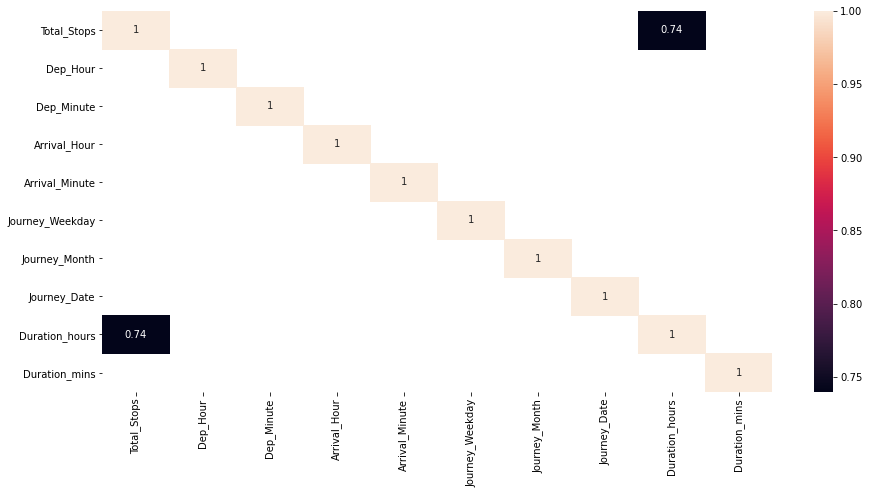

In [334]:
plt.figure(figsize = (15,7))
sns.heatmap(flight_data_num_scaled.corr()[flight_data_num_scaled.corr()>0.6],annot=True)

In [335]:
flight_data_num_scaled.drop('Duration_hours',axis=1,inplace=True)

<AxesSubplot:>

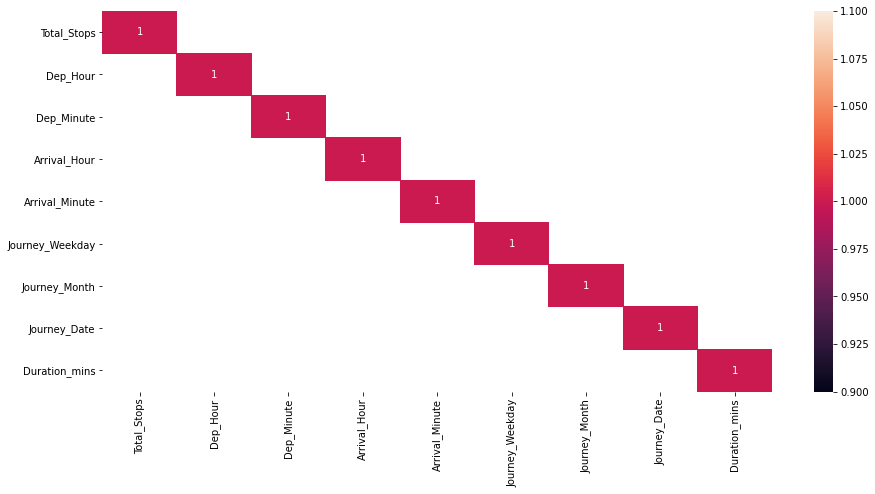

In [336]:
plt.figure(figsize = (15,7))
sns.heatmap(flight_data_num_scaled.corr()[flight_data_num_scaled.corr()>0.6],annot=True)

In [337]:
flight_data_dummies = flight_data.select_dtypes(include='object').reset_index()
flight_data_dummies = pd.DataFrame(flight_data_dummies)
flight_data_dummies.drop('index',axis=1,inplace=True)
flight_data_dummies.head()

,Airline,Source,Destination
0,IndiGo,Banglore,New Delhi
1,Air India,Kolkata,Banglore
2,Jet Airways,Delhi,Cochin
3,IndiGo,Kolkata,Banglore
4,IndiGo,Banglore,New Delhi


In [338]:
flight_data_dummies = pd.get_dummies(flight_data_dummies)
flight_data_dummies.head()
flight_data_dummies.columns

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [339]:
flight_data_dummies.isnull().sum()

Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Banglore                              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Banglore                         0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_K

In [340]:
X = pd.concat([flight_data_num_scaled,flight_data_dummies],axis=1)
X.shape

(10682, 32)

In [341]:
X = pd.DataFrame(np.hstack([flight_data_num_scaled,flight_data_dummies]),columns= ['Total_Stops', 'Dep_Hour', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute', 'Journey_Weekday', 'Journey_Month', 'Journey_Date',
        'Duration_mins','Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'])
X.shape

(10682, 32)

In [342]:
y.head()

0    3897.000000
1    7662.000000
2   13882.000000
3    6218.000000
4   13302.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

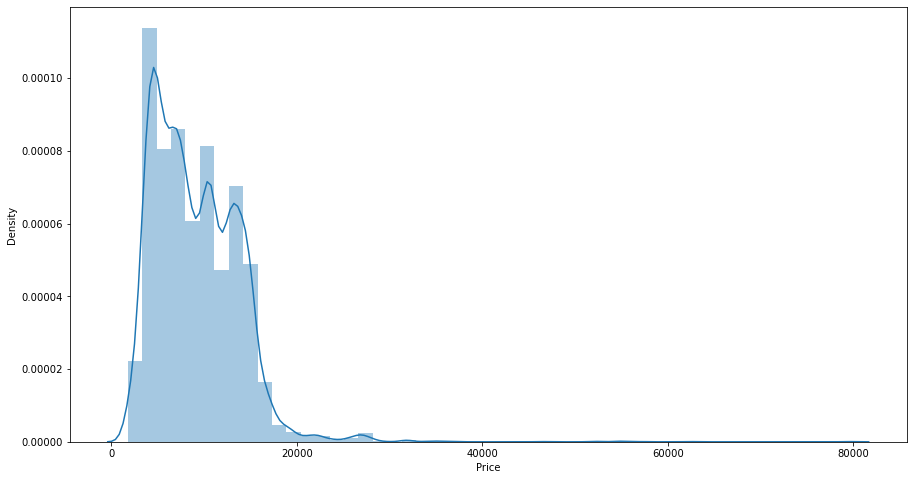

In [346]:
sns.distplot(y)

In [343]:
y_scaled = (y - y.mean()) / y.std()
y_scaled.head()

0   -1.125482
1   -0.309053
2    1.039734
3   -0.622180
4    0.913963
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

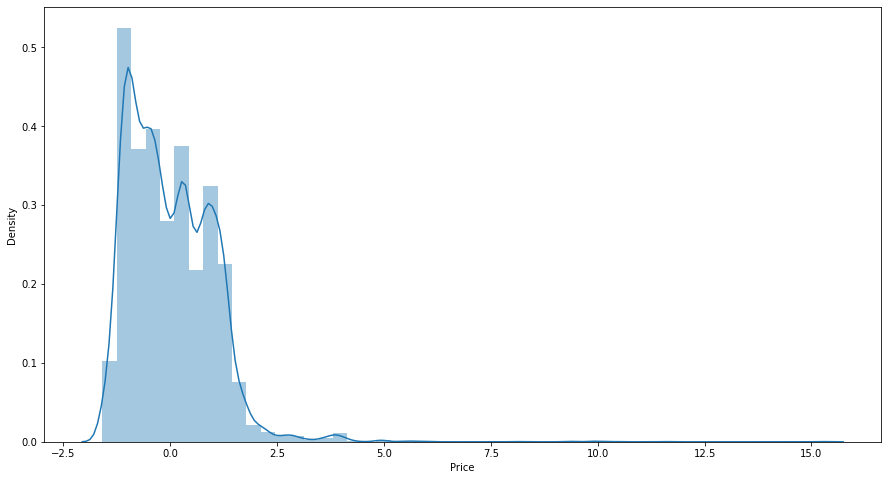

In [347]:
sns.distplot(y_scaled)

In [344]:
y_log = np.log(y)
y_log.head()

0   8.267962
1   8.944028
2   9.538348
3   8.735204
4   9.495670
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

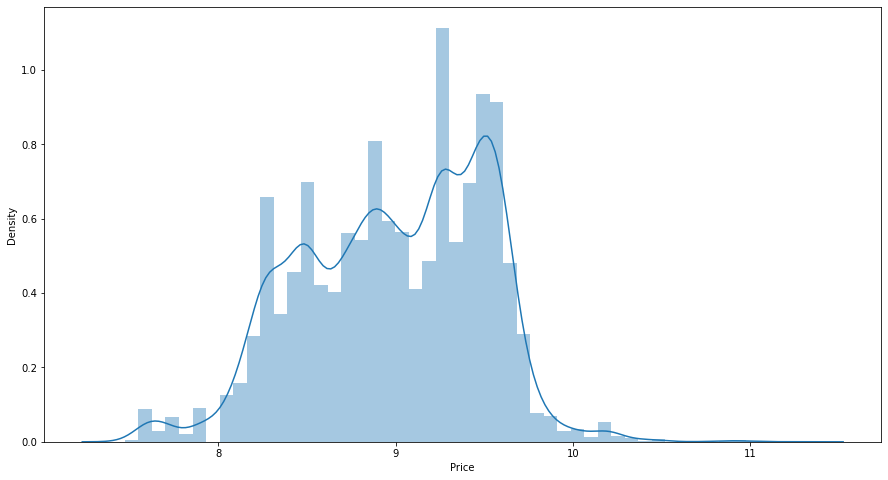

In [348]:
sns.distplot(y_log)

In [345]:
df_final = pd.concat([X,y],axis=1).reset_index()
df_final.shape

(10682, 34)

In [349]:
y.shape

(10682,)

In [351]:
X.head()

,Total_Stops,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Journey_Weekday,Journey_Month,Journey_Date,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220666,1.654154,-0.234950,-1.800436,-0.890014,1.692538,-0.848450,1.285536,1.279041,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,1.741432,-1.303113,1.363607,-0.050909,-0.587094,1.147887,-1.517909,-0.872724,-0.196319,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.741432,-0.607286,0.031476,-1.363054,0.018745,0.603236,1.159928,-0.759131,-1.671678,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,0.260383,0.958326,-1.034229,1.407030,0.321664,0.058585,2.164117,-0.872724,-0.196319,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.260383,0.610412,1.363607,1.115442,0.624584,0.058585,-1.517909,-1.099909,0.983969,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


<a id="split"></a>
## 4. Train-Test Split

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state = 0)
print('X train Shape:',X_train.shape)
print('X test Shape:',X_test.shape)
print('y train Shape:',y_train.shape)
print('y test Shape:',y_test.shape)

X train Shape: (8545, 32)
X test Shape: (2137, 32)
y train Shape: (8545,)
y test Shape: (2137,)


In [353]:
# create the table for all the model performance metrics
# metrics considered for model comparision are MSE, RMSE, MAE and MAPE
# create a list of column names
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE', 'RMSE', 'MAE']

# creating a empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

<a id="model"></a>
## 5. Model Building

<a id="full"></a>
### 5.1 MLR Full Model

In [354]:
from sklearn.linear_model import LinearRegression

In [355]:
base_model = LinearRegression()
base_model.fit(X_train,y_train)

LinearRegression()

In [356]:
base_model_r2 = base_model.score(X_train,y_train)
base_model_Adj_r2 = 1 - (1-base_model_r2)*(len(y_train)-1)/(len(y_train)- X_train.shape[1]-1)
base_model_mse = mean_squared_error(y_train,base_model.predict(X_train))
base_model_mae = mean_absolute_error(y_train,base_model.predict(X_train))
base_model_rmse = np.sqrt(base_model_mse)
base_model_mape = (np.mean(np.abs((y_train - base_model.predict(X_train)) / y_train)) * 100)

In [357]:
base_model_metrics = pd.Series({'Model_Name': "MLR Base Model",
                     'R-squared': base_model_r2,
                     'Adj. R-squared': base_model_Adj_r2,
                     'MSE': base_model_mse,
                     'RMSE': base_model_rmse,
                     'MAE': base_model_mae,
                     'MAPE' :base_model_mape
                   })

# append the values to the result table
result_table = result_table.append(base_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Base Model,0.723102,0.722061,0.072086,0.268488,0.204462,2.271043


In [358]:
# create the table for all the model performance metrics
# metrics considered for model comparision are MSE, RMSE, MAE and MAPE
# create a list of column names
cols = ['Model_Name', 'R-squared_test', 'Adj. R-squared_test']

# creating a empty dataframe of the colums
result_table_test = pd.DataFrame(columns = cols)

In [359]:
base_model_r2_test = base_model.score(X_test,y_test)
base_model_Adj_r2_test = 1 - (1-base_model_r2)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)



base_model_metrics_test = pd.Series({'Model_Name': "MLR Base Model",
                     'R-squared_test': base_model_r2_test,
                     'Adj. R-squared_test': base_model_Adj_r2_test})
                     
                                      
result_table_test = result_table_test.append(base_model_metrics_test, ignore_index = True)

# print the result table
result_table_test

,Model_Name,R-squared_test,Adj. R-squared_test
0,MLR Base Model,0.721674,0.718891


In [360]:
from sklearn.metrics import r2_score
r2_score(y_train,base_model.predict(X_train))

0.7231019275702284

In [361]:
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

In [362]:
MLR = sm.OLS(y_train,X_train_ols).fit()
print(MLR.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     889.9
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        10:21:57   Log-Likelihood:                -888.60
No. Observations:                8545   AIC:                             1829.
Df Residuals:                    8519   BIC:                             2013.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

<a id="signi_var"></a>
### 5.2 MLR Model after Removing Insignificant Variables

In [363]:
MLR_pvalues = pd.DataFrame(MLR.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.000000
Total_Stops,0.000000
Dep_Hour,0.362817
Dep_Minute,0.285753
Arrival_Hour,0.967823
Arrival_Minute,0.045083
Journey_Weekday,0.274854
Journey_Month,0.000001
Journey_Date,0.000000
Duration_mins,0.475777


In [364]:
# subset the dataframe 'MLR_pvalues' such that the variables will have p-value greater than 0.05
# store the subset of a dataframe to a new dataframe 'insignificant_var' 
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['Dep_Hour',
 'Dep_Minute',
 'Arrival_Hour',
 'Journey_Weekday',
 'Duration_mins',
 'Airline_SpiceJet',
 'Airline_Trujet']

In [365]:
X_train_signi_var = X_train_ols.drop(insigni_var, axis=1)

# drop the insignificant variables from the dataframe 'X_test_signi_var'
# 'axis = 1' drops the corresponding column(s)
X_test_signi_var = X_test_ols.drop(insigni_var, axis=1)

# building a model on training dataset
# fit() is used to fit the OLS model
MLR_model_with_significant_var = sm.OLS(y_train, X_train_signi_var).fit()

# print the summary output
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1171.
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        10:21:57   Log-Likelihood:                -890.64
No. Observations:                8545   AIC:                             1821.
Df Residuals:                    8525   BIC:                             1962.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [366]:
Signi_var_model = LinearRegression()

In [367]:
Signi_var_model.fit(X_train_signi_var,y_train)

LinearRegression()

In [368]:
Signi_var_model.score(X_train_signi_var,y_train)

0.7229697135627733

In [369]:
Signi_var_model_r2 = Signi_var_model.score(X_train_signi_var,y_train)
Signi_var_model_Adj_r2 = 1 - (1-Signi_var_model_r2)*(len(y_train)-1)/(len(y_train)- X_train_signi_var.shape[1]-1)
Signi_var_model_mse = mean_squared_error(y_train,Signi_var_model.predict(X_train_signi_var))
Signi_var_model_mae = mean_absolute_error(y_train,Signi_var_model.predict(X_train_signi_var))
Signi_var_model_rmse = np.sqrt(Signi_var_model_mse)
Signi_var_model_mape = (np.mean(np.abs((y_train - Signi_var_model.predict(X_train_signi_var)) / y_train)) * 100)

In [370]:
Signi_var_model_metrics = pd.Series({'Model_Name': "MLR with Significant variables",
                     'R-squared': Signi_var_model_r2,
                     'Adj. R-squared' :Signi_var_model_Adj_r2,
                     'MSE': Signi_var_model_mse,
                     'RMSE': Signi_var_model_mae,
                     'MAE': Signi_var_model_rmse,
                    'MAPE' :Signi_var_model_mape
                   })

# append the values to the result table
result_table = result_table.append(Signi_var_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Base Model,0.723102,0.722061,0.072086,0.268488,0.204462,2.271043
1,MLR with Significant variables,0.722970,0.722124,0.072120,0.204511,0.268552,2.271311


In [371]:
Signi_var_model_r2_test = Signi_var_model.score(X_test_signi_var,y_test)
Signi_var_model_Adj_r2_test = 1 - (1-Signi_var_model_r2_test)*(len(y_test)-1)/(len(y_test)- X_test_signi_var.shape[1]-1)


Signi_var_model_metrics_test = pd.Series({'Model_Name': "MLR with Significant variables",
                     'R-squared_test': Signi_var_model_r2_test,
                     'Adj. R-squared_test': Signi_var_model_Adj_r2_test})
                                      
result_table_test = result_table_test.append(Signi_var_model_metrics_test, ignore_index = True)

# print the result table
result_table_test

,Model_Name,R-squared_test,Adj. R-squared_test
0,MLR Base Model,0.721674,0.718891
1,MLR with Significant variables,0.721107,0.717670


In [372]:
df_numeric_features_vif = flight_data_num_scaled.copy()

# display the first five observations
df_numeric_features_vif.head()

,Total_Stops,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Journey_Weekday,Journey_Month,Journey_Date,Duration_mins
0,-1.220666,1.654154,-0.234950,-1.800436,-0.890014,1.692538,-0.848450,1.285536,1.279041
1,1.741432,-1.303113,1.363607,-0.050909,-0.587094,1.147887,-1.517909,-0.872724,-0.196319
2,1.741432,-0.607286,0.031476,-1.363054,0.018745,0.603236,1.159928,-0.759131,-1.671678
3,0.260383,0.958326,-1.034229,1.407030,0.321664,0.058585,2.164117,-0.872724,-0.196319
4,0.260383,0.610412,1.363607,1.115442,0.624584,0.058585,-1.517909,-1.099909,0.983969


In [373]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,1.127735,Journey_Month
1,1.101277,Journey_Date
2,1.062263,Duration_mins
3,1.058331,Arrival_Minute
4,1.053790,Journey_Weekday
5,1.037444,Arrival_Hour
6,1.035402,Total_Stops
7,1.013028,Dep_Minute
8,1.011239,Dep_Hour


<a id="pca"></a>
### 5.3 MLR Model with PCA Technique

In [374]:
from sklearn.decomposition import PCA

In [375]:
pca = PCA(n_components=24)

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state = 10)
print('X train Shape:',X_train.shape)
print('X test Shape:',X_test.shape)
print('y train Shape:',y_train.shape)
print('y test Shape:',y_test.shape)

X train Shape: (8545, 32)
X test Shape: (2137, 32)
y train Shape: (8545,)
y test Shape: (2137,)


In [377]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

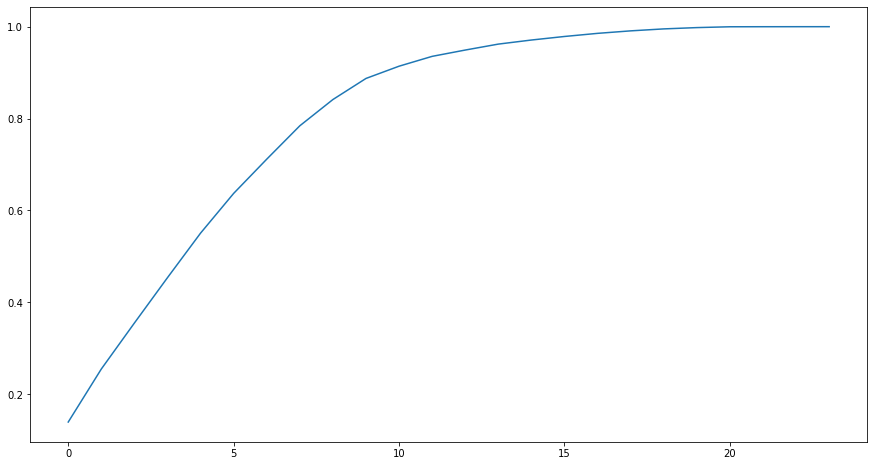

In [378]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [379]:
PCA_model = LinearRegression()

In [380]:
PCA_model.fit(X_train,y_train)

LinearRegression()

In [381]:
PCA_model_r2 = PCA_model.score(X_train,y_train)
PCA_model_Adj_r2 = 1 - (1-PCA_model_r2)*(len(y_train)-1)/(len(y_train)- X_train.shape[1]-1)
PCA_model_mse = mean_squared_error(y_train,PCA_model.predict(X_train))
PCA_model_mae = mean_absolute_error(y_train,PCA_model.predict(X_train))
PCA_model_rmse = np.sqrt(PCA_model_mse)
PCA_model_mape = (np.mean(np.abs((y_train -PCA_model.predict(X_train)) / y_train)) * 100)

In [382]:
PCA_model_metrics = pd.Series({'Model_Name': "MLR with PCA Technique",
                     'R-squared': PCA_model_r2,
                     'Adj. R-squared': PCA_model_Adj_r2,
                     'MSE': PCA_model_mse,
                     'RMSE': PCA_model_mae,
                     'MAE': PCA_model_rmse,
                    'MAPE':PCA_model_mape,
                   })

# append the values to the result table
result_table = result_table.append(PCA_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Base Model,0.723102,0.722061,0.072086,0.268488,0.204462,2.271043
1,MLR with Significant variables,0.722970,0.722124,0.072120,0.204511,0.268552,2.271311
2,MLR with PCA Technique,0.722872,0.722092,0.072948,0.205053,0.270088,2.277220


<a id="rfe"></a>
### 5.4 MLR Model with RFE Technique

In [383]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state = 10)
print('X train Shape:',X_train.shape)
print('X test Shape:',X_test.shape)
print('y train Shape:',y_train.shape)
print('y test Shape:',y_test.shape)

X train Shape: (8545, 32)
X test Shape: (2137, 32)
y train Shape: (8545,)
y test Shape: (2137,)


In [385]:
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 23)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Total_Stops', 'Journey_Date', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_New Delhi'],
      dtype='object')


In [386]:
RFE_X_train = X_train[['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

# initiate linear regression
RFE_model = LinearRegression()

# build the model using new_X_train and y_train
RFE_model.fit(RFE_X_train, y_train)

# check the score
RFE_model.score(RFE_X_train, y_train)

0.6353978566903886

In [387]:
RFE_model_r2 = RFE_model.score(RFE_X_train,y_train)
RFE_model_Adj_r2 = 1 - (1-RFE_model_r2)*(len(y_train)-1)/(len(y_train)- X_train.shape[1]-1)
RFE_model_mse = mean_squared_error(y_train,RFE_model.predict(RFE_X_train))
RFE_model_mae = mean_absolute_error(y_train,RFE_model.predict(RFE_X_train))
RFE_model_rmse = np.sqrt(RFE_model_mse)
RFE_model_mape = (np.mean(np.abs((y_train -RFE_model.predict(RFE_X_train)) / y_train)) * 100)

In [388]:
RFE_model_metrics = pd.Series({'Model_Name': "RFE Model",
                     'R-squared': RFE_model_r2,
                     'Adj. R-squared': RFE_model_Adj_r2,
                     'MSE': RFE_model_mse,
                     'RMSE': RFE_model_mae,
                     'MAE': RFE_model_rmse,
                     'MAPE': RFE_model_mape
                   })

# append the values to the result table
result_table = result_table.append(RFE_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Base Model,0.723102,0.722061,0.072086,0.268488,0.204462,2.271043
1,MLR with Significant variables,0.722970,0.722124,0.072120,0.204511,0.268552,2.271311
2,MLR with PCA Technique,0.722872,0.722092,0.072948,0.205053,0.270088,2.277220
3,RFE Model,0.635398,0.634027,0.095974,0.233257,0.309796,2.598350


<a id="fwd"></a>
### 5.5 MLR Model with Forward selection Technique

In [389]:
# initiate linear regression model to use in feature selection
model_fwd = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
model_forward = sfs(estimator = model_fwd, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = model_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished

[2021-05-22 10:21:58] Features: 1/32 -- score: 0.48224465497840807[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.2s finished

[2021-05-22 10:21:58] Features: 2/32 -- score: 0.5719940085976026[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished

[2021-05-22 10:21:59] Features: 3/32 -- score: 0.6094161422830261[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2021-05-22 10:22:07] Features: 28/32 -- score: 0.7211620939353482[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2021-05-22 10:22:07] Features: 29/32 -- score: 0.7211547588158151[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-05-22 10:22:07] Features: 30/32 -- score: 0.7211218783624197[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-05-22 10:22:07] Features: 31/

In [390]:
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)
print(len(sfs_forward.k_feature_names_))

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('Total_Stops', 'Dep_Hour', 'Arrival_Minute', 'Journey_Month', 'Journey_Date', 'Duration_mins', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_New Delhi')
22

R-Squared:  0.7212754426904715


In [391]:
fwd_model_r2 = sfs_forward.k_score_
fwd_model_Adj_r2 = 1 - (1-fwd_model_r2)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)
#fwd_model_mse = mean_squared_error(y_test,RFE_model.predict(RFE_X_train))
#fwd_model_mae = mean_absolute_error(y_train,RFE_model.predict(RFE_X_train))
#fwd_model_rmse = np.sqrt(fwd_model_mse)

In [392]:
Forward_model_metrics = pd.Series({'Model_Name': "Forward",
                     'R-squared': fwd_model_r2,
                     'Adj. R-squared': fwd_model_Adj_r2
                   })

# append the values to the result table
result_table = result_table.append(Forward_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Base Model,0.723102,0.722061,0.072086,0.268488,0.204462,2.271043
1,MLR with Significant variables,0.722970,0.722124,0.072120,0.204511,0.268552,2.271311
2,MLR with PCA Technique,0.722872,0.722092,0.072948,0.205053,0.270088,2.277220
3,RFE Model,0.635398,0.634027,0.095974,0.233257,0.309796,2.598350
4,Forward,0.721275,0.717036,nan,nan,nan,nan


<a id="bwd"></a>
### 5.6 MLR Model with Backward selection Technique

In [393]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build backward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.2s finished

[2021-05-22 10:22:08] Features: 31/1 -- score: 0.7211914508111587[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.0s finished

[2021-05-22 10:22:09] Features: 30/1 -- score: 0.7211980139078552[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished

[2021-05-22 10:22:10] Features: 29/1 -- score: 0.7212354820150013[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  


[2021-05-22 10:22:22] Features: 3/1 -- score: 0.6094161422830261[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-05-22 10:22:22] Features: 2/1 -- score: 0.5719940085976026[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-05-22 10:22:22] Features: 1/1 -- score: 0.48224465497840807

In [394]:
# print the selected feature names when k_features = 12
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)
print(len(sfs_backward.k_feature_names_))
# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('Total_Stops', 'Dep_Hour', 'Arrival_Minute', 'Journey_Month', 'Journey_Date', 'Duration_mins', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore', 'Source_Delhi', 'Source_Kolkata', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Kolkata', 'Destination_New Delhi')
23

R-Squared:  0.7212651563582103


In [395]:
bwd_model_r2 = sfs_backward.k_score_
bwd_model_Adj_r2 = 1 - (1-bwd_model_r2)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [396]:
Backward_model_metrics = pd.Series({'Model_Name': "Backward",
                     'R-squared': bwd_model_r2,
                     'Adj. R-squared': bwd_model_Adj_r2
                   })

# append the values to the result table
result_table = result_table.append(Backward_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Base Model,0.723102,0.722061,0.072086,0.268488,0.204462,2.271043
1,MLR with Significant variables,0.722970,0.722124,0.072120,0.204511,0.268552,2.271311
2,MLR with PCA Technique,0.722872,0.722092,0.072948,0.205053,0.270088,2.277220
3,RFE Model,0.635398,0.634027,0.095974,0.233257,0.309796,2.598350
4,Forward,0.721275,0.717036,nan,nan,nan,nan
5,Backward,0.721265,0.717026,nan,nan,nan,nan


Interpretation : We can conclude from the above table that the model built considering Significant variables perfoms better compared to all other models.

Lets go ahead and check if the assumptions of LR are met considring this model

<a id="assum"></a>
## 6. Assumptions After MLR Model

Now, we use the model with significant variabels to check some of the assumptions based on the residuals of linear regression:
1. Linear Relationship Between Dependent and Independent Variable
2. Autocorrelation
3. Heteroscedasticity
4. Tests of Normality 

<a id="linear_reln"></a>
### 6.1 Linear Relationship between Dependent and Independent Variable

An assumption of linear regression is that it should be linear in the parameter. To check the linearity we plot a graph of residuals and each independent variable. If the plot shows no specific pattern then we can conclude the presence of linearity.

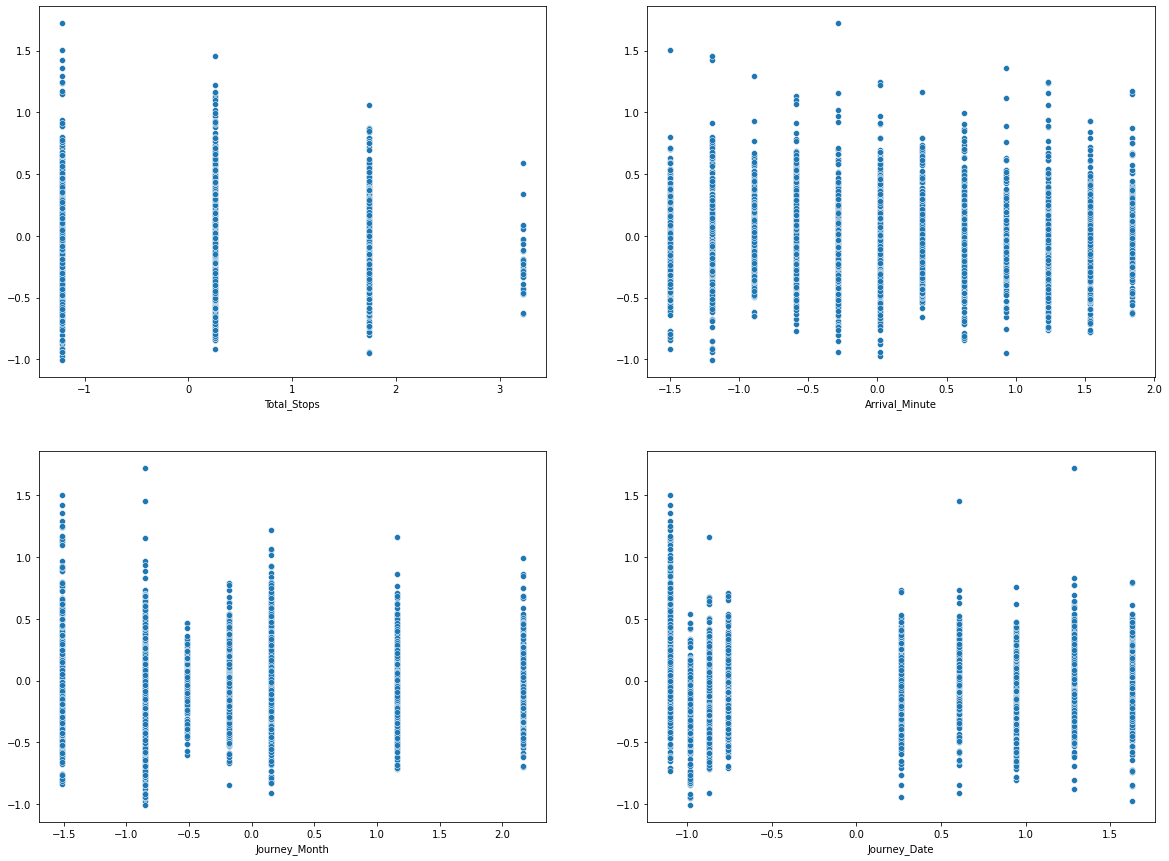

In [397]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_signi_var.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train_signi_var[variable],MLR_model_with_significant_var.resid , ax=subplot)

# display the plot
plt.show()

**Interpretation:** The above plots show no specific pattern, implies that there is a linearity present in the data.

<a id="auto"></a>
### 6.2 Autocorrelation

We can check the correlation between the residuals using the `Durbin-Watson` test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.

Print the summary of the model with significant variables to check the autocorrelation.

In [398]:
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1171.
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        10:22:23   Log-Likelihood:                -890.64
No. Observations:                8545   AIC:                             1821.
Df Residuals:                    8525   BIC:                             1962.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 2.042). Thus, we conclude that there is no autocorrelation.

<a id="sked"></a>
### 6.3 Heteroskedasticity

If the residuals have constant variance across different values of the predicted values, then it is known as `Homoskedasticity`. The absence of homoskedasticity is known as, heteroskedasticity. One of the assumptions of linear regression is that heteroskedasticity should not be present. Let us study two different tests to check the presence of  heteroskedasticity.

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [406]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_model_with_significant_var.resid, MLR_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 53.72064688879809), ('p-value', 1.5481764100042411e-192)]

<a id="normality"></a>
### 6.4 Tests for Normality

As per the assumptions of linear regression, residuals should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for the target variable.

<a id="qq"></a>
#### 1. Q-Q Plot

Q-Q plot is s visualization technique to check the normality of the residuals. It plots the quantiles of observed data versus the quantiles of the standard normal distribution.

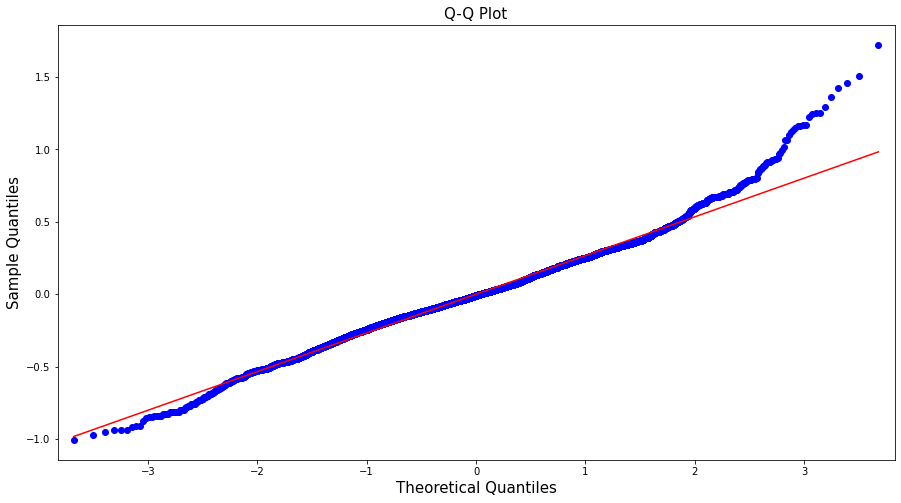

In [400]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_with_significant_var.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are close to the diagonal line, we conclude that the residuals do not follow a `normal distribution`.

<a id="SWT"></a>
#### 2. Shapiro Wilk Test

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [401]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_model_with_significant_var.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9868017435073853
P-Value: 1.8573244679082737e-27


**Interpretation:** From the above test we can see that the p-value less than 0.05, thus we can say that the residuals are not normally distributed.

<a id="eval"></a>
## 7. Model Evaluation

In this section, we evaluate the model containing significant variables. 

Let us print the summary of the multiple regression model.

In [402]:
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1171.
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        10:22:23   Log-Likelihood:                -890.64
No. Observations:                8545   AIC:                             1821.
Df Residuals:                    8525   BIC:                             1962.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [403]:
result_table_test

,Model_Name,R-squared_test,Adj. R-squared_test
0,MLR Base Model,0.721674,0.718891
1,MLR with Significant variables,0.721107,0.717670


## 8. K fold Validation

In [404]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X, 
                         y = y_log, 
                         cv = 10, 
                         scoring = 'r2')

In [405]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(np.min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(np.max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.71798703 0.7178028  0.73447378 0.749138   0.72538997 0.70879232
 0.71033305 0.68413951 0.72269838 0.7404197 ]

Minimum score obtained:  0.6841
Maximum score obtained:  0.7491
Average score obtained:  0.7211


References:

https://www.kaggle.com/